In [1]:
import pandas as pd
abbb = pd.read_csv('/content/abbb.csv',index_col=0)
abbb22 = pd.read_csv('/content/abbb22.csv',index_col=0)

In [2]:
# 必要なモジュールのインストール
!pip install LightGBM

import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 予測ターゲットの格納
target_df = abbb[["volatility"]]
# 特徴量の格納
train_df = abbb.iloc[:, 14:20]

In [3]:
train_df

,Distance_to_nearest_station,Distance_to_center,population(2015),income,loan_balance,MSPUS
0,500,5.028203,3393.138937,551662191.8,1.476475,1.493859
1,500,5.028203,3393.138937,551662191.8,1.476475,1.493859
2,300,4.306034,3393.138937,551662191.8,1.476475,1.493859
3,300,4.306034,3393.138937,551662191.8,1.476475,1.493859
4,330,3.667019,3393.138937,551662191.8,1.476475,1.493859
...,...,...,...,...,...,...
5105,210,18.229874,8116.825397,774466465.2,1.476475,1.493859
5106,1400,17.586661,8116.825397,774466465.2,1.476475,1.493859
5107,1400,17.586661,8116.825397,774466465.2,1.476475,1.493859
5108,560,15.363044,8116.825397,774466465.2,1.476475,1.493859


In [4]:


# 予測ターゲットの格納
target_df22 = abbb22[["volatility"]]
# 特徴量の格納
train_df22 = abbb22.iloc[:, 14:20]

# トレーニングセットと検証セットに分割
X_train, X_valid, y_train, y_valid = train_test_split(train_df, target_df, test_size=0.2, random_state=42, shuffle=True)

X_test = train_df22
y_test = target_df22
# LightGBMで学習するためのデータ形式に変換
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_valid, y_valid)
dtest = lgb.Dataset(X_test, y_test)
# モデルパラメータの設定
params = {
    'boosting_type': 'gbdt',  # GBDTを指定
    'objective': 'regression',
    'metric': 'rmse'
}

# モデルの学習
model = lgb.train(params, dtrain, valid_sets=[dvalid])


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000451 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 492
[LightGBM] [Info] Number of data points in the train set: 4088, number of used features: 4
[LightGBM] [Info] Start training from score 4.194398


In [5]:

#学習の保存
import pickle

pred = model.predict(X_test)

with open('/content/model.pkl', 'wb') as model_file:
	pickle.dump(model, model_file)


In [6]:
import numpy as np

MAE: 2.5453
MSE: 11.3677
RMSE 1: 3.3716
RMSE 2: 3.3716
R2 score: -1.8253


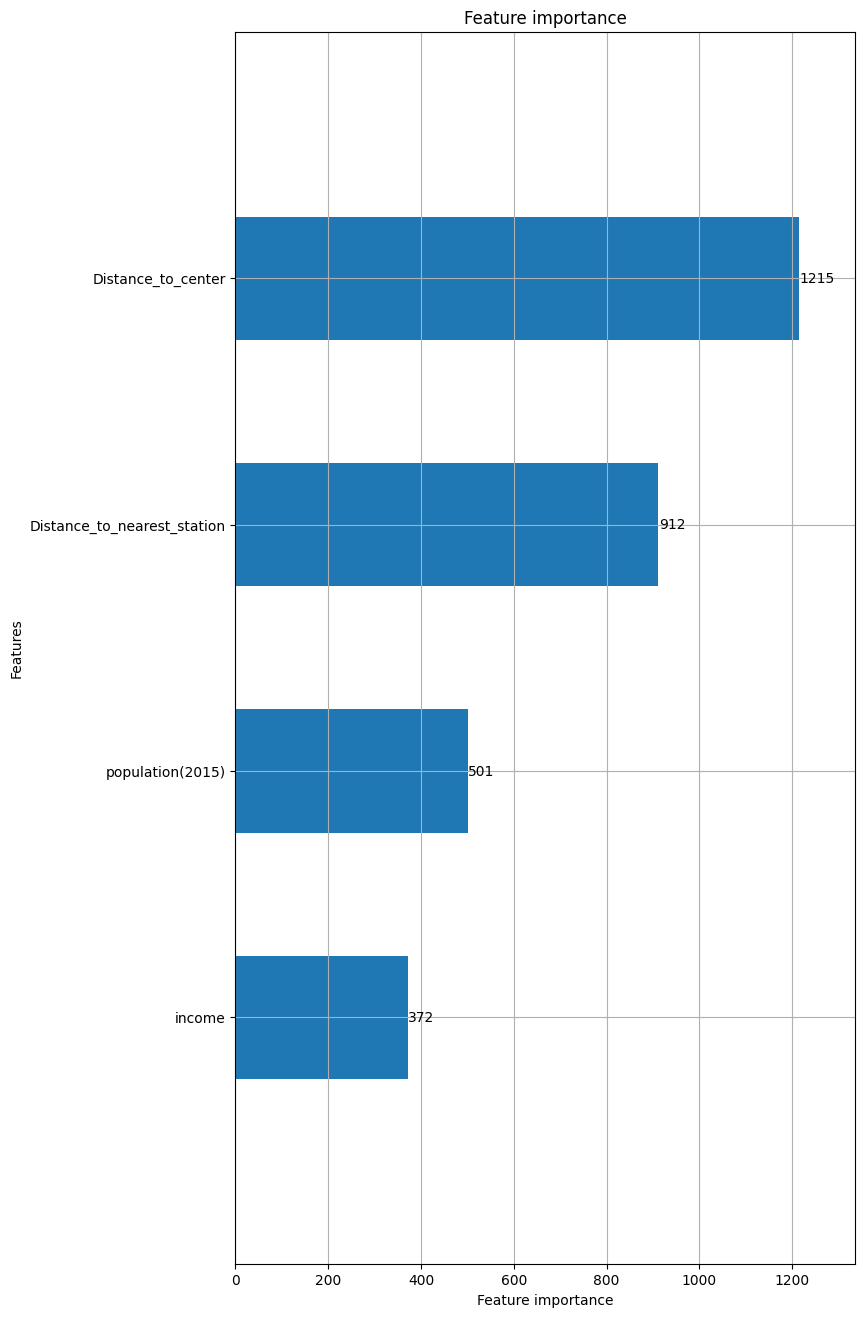

In [7]:
# 性能向上に寄与する度合いで重要度をプロット
lgb.plot_importance(model, height = 0.5, figsize = (8,16))

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error


mae = mean_absolute_error(y_test, pred)
print("MAE:", round(mae, 4))

mse = mean_squared_error(y_test, pred)
print("MSE:", round(mse, 4))

rmse1 = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE 1:", round(rmse1, 4))

rmse2 = mean_squared_error(y_test, pred, squared=False)
print("RMSE 2:", round(rmse2, 4))

r2score = r2_score(y_test, pred)
print("R2 score:", round(r2score, 4))

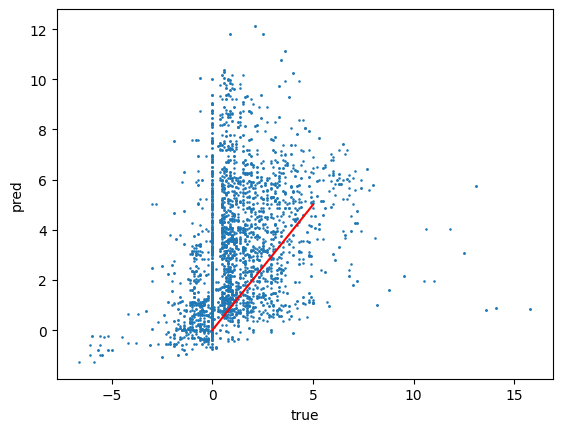

In [8]:
plt.scatter(y_test, pred,s=0.7,alpha = 1)
plt.plot(np.linspace(0, 5, 10), np.linspace(0, 5, 10), "red")
plt.xlabel('true')
plt.ylabel('pred')
plt.show()

In [9]:
fYfX = abbb22.iloc[::2,0:2].reset_index(drop=True)

In [10]:
pred2 = pd.Series(pred)

In [11]:
pred2.to_csv('/content/pred.csv')

In [12]:
y_test2=y_test["volatility"]

In [13]:

# 誤差（実際の値 - 予測値）を計算
ae2 = abs(y_test2 - pred2)
aveae =pd.Series([(ae2[i]+ae2[i+1])/2 for i in range(0, len(ae2), 2)])

aveae_min = aveae.min()
aveae_max = aveae.max()
normalized_aveae = (aveae - aveae_min) / (aveae_max - aveae_min)

normalized_aveae_df = pd.DataFrame(normalized_aveae)
beforeplot = pd.concat([normalized_aveae_df,fYfX], axis=1,join='inner')
# 各データポイントの誤差を表示
#for i, error in enumerate(errors):
    #print(f"Data point {i}: Error = {error[0]}")

In [14]:
beforeplot

,0,fY,fX
0,0.230760,34.72807,135.52237
1,0.036108,34.71320,135.53400
2,0.026470,34.71069,135.53224
3,0.019015,34.69979,135.52643
4,0.016995,34.70428,135.53217
...,...,...,...
1706,0.035666,34.47673,135.64720
1707,0.009184,34.50359,135.63501
1708,0.044610,34.50566,135.62691
1709,0.116008,34.47342,135.63361


In [15]:
import geopandas as gpd

# 大阪府の地図データを読み込み（ここでは仮のパスを使用）
osaka_map = gpd.read_file('/content/N03-19_27_190101.shp')

# 正規化されたデータと緯度経度を含むDataFrameを作成
# ここでは normalized_ae2, latitudes, longitudes が既に存在すると仮定


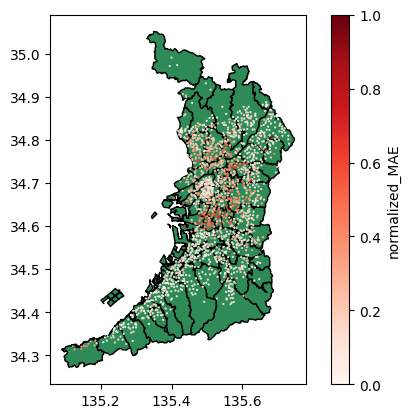

In [16]:
# プロット作成
fig, ax = plt.subplots()
osaka_map.plot(ax=ax, color='seagreen', edgecolor='black')
plt.scatter(beforeplot['fX'], beforeplot['fY'],s=0.31, c=beforeplot[0], cmap='Reds',alpha=1.0 )
plt.colorbar(label='normalized_MAE')
plt.show()

In [17]:
!pip install shap
import shap
shap.initjs()
explainer = shap.TreeExplainer(model,data=X_train)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.3 MB/s eta 0:00:00


In [18]:
tr_x_shap_values = explainer.shap_values(X_train)

 96%|=================== | 3923/4088 [00:33<00:01]       

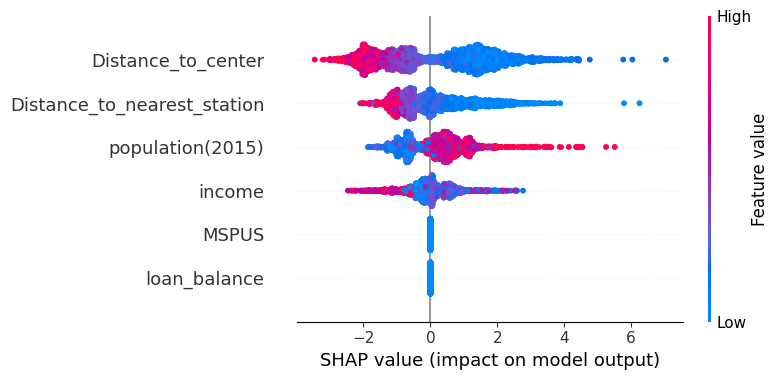

In [19]:
shap.summary_plot(shap_values=tr_x_shap_values,
                  features=X_train,
                  feature_names=X_train.columns)

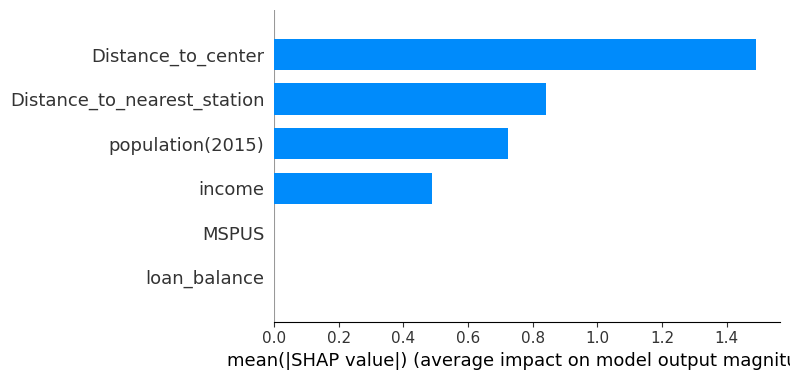

In [20]:
shap.summary_plot(shap_values=tr_x_shap_values,
                  features=X_train,
                  feature_names=X_train.columns,
                  plot_type='bar')

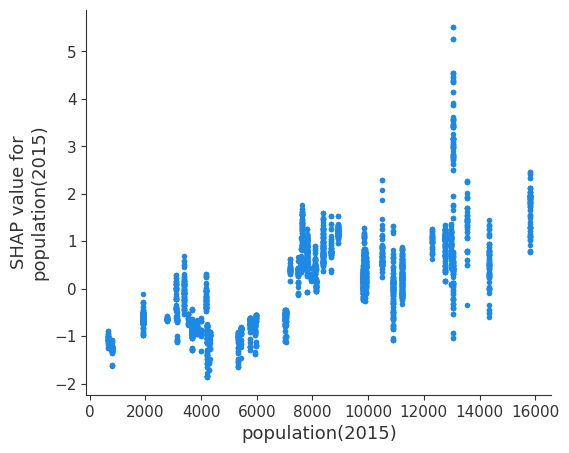

In [21]:
shap.dependence_plot(ind='population(2015)',
                     interaction_index=None,
                     shap_values=tr_x_shap_values,
                     features=X_train,
                     feature_names=X_train.columns)

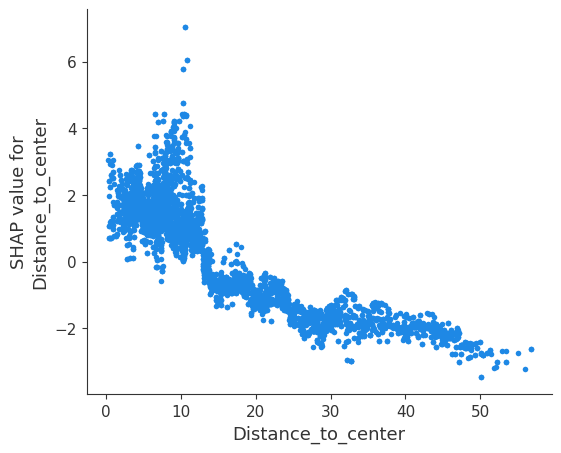

In [22]:
shap.dependence_plot(ind='Distance_to_center',
                     interaction_index=None,
                     shap_values=tr_x_shap_values,
                     features=X_train,
                     feature_names=X_train.columns)

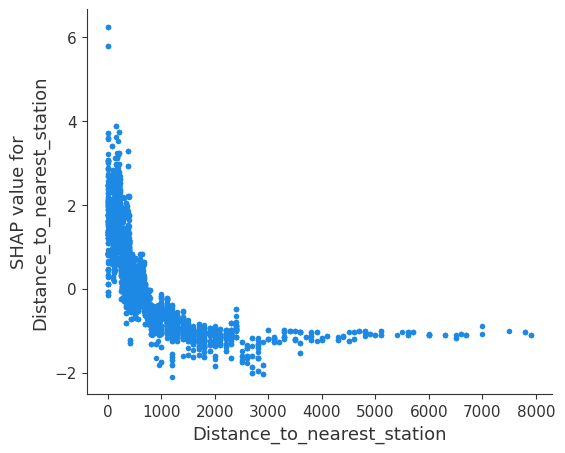

In [23]:
shap.dependence_plot(ind='Distance_to_nearest_station',
                     interaction_index=None,
                     shap_values=tr_x_shap_values,
                     features=X_train,
                     feature_names=X_train.columns)

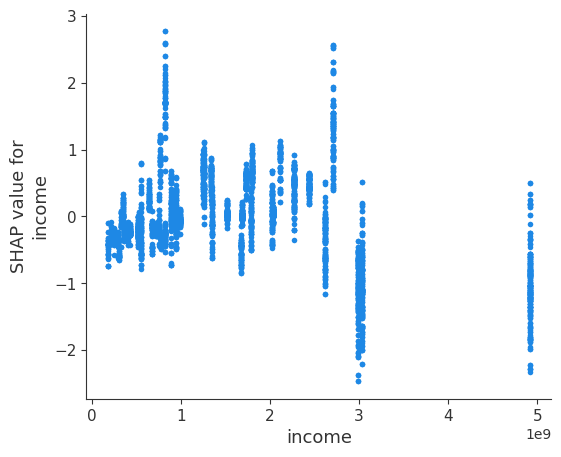

In [24]:
shap.dependence_plot(ind='income',
                     interaction_index=None,
                     shap_values=tr_x_shap_values,
                     features=X_train,
                     feature_names=X_train.columns)

In [25]:
shap.force_plot(base_value=explainer.expected_value,
                shap_values=tr_x_shap_values,
                features=X_train,
                feature_names=X_train.columns)

shap.plots.force is slow for many thousands of rows, try subsampling your data.


In [26]:
shap.waterfall_plot(expected_value=explainer.expected_value,
                    shap_values=tr_x_shap_values[0],
                    features=X_train.iloc[0],
                    feature_names=X_train.columns)

TypeError: waterfall() got an unexpected keyword argument 'expected_value'